In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
from collections import Counter

In [2]:
# pick df
df = pd.read_csv("/home/hra35/Documents/events/nll_script_outputs/D7/picks_final.txt", sep=r'\s+', header=0)

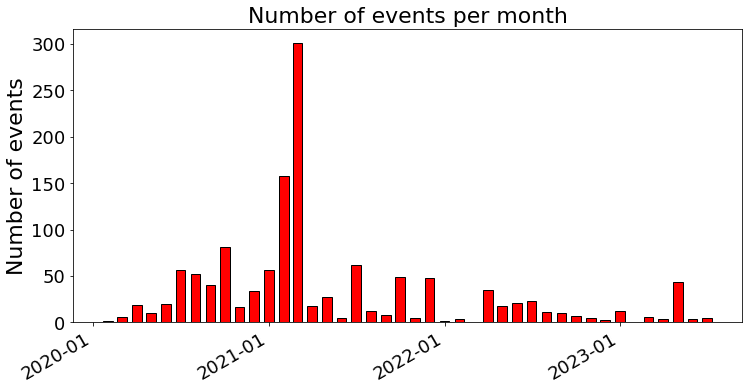

In [4]:
# get events
events = list(df['event_ID'].unique())

datetimes = []
for event in events:
    timestamp = str(event)
    datetime_object = datetime.strptime(timestamp, '%Y%m%d%H%M%S%f')
    datetimes.append(datetime_object)

month_year_strings = [date.strftime('%Y-%m') for date in datetimes]
month_year_counts = Counter(month_year_strings)

sorted_month_years = sorted(month_year_counts.keys())

counts = [month_year_counts[month_year] for month_year in sorted_month_years]
month_years = [datetime.strptime(month_year, '%Y-%m') for month_year in sorted_month_years]

plt.figure(figsize=(12,6))

plt.bar(month_years, counts, width=20, edgecolor='black', color='red')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

# Labels and title
plt.ylabel('Number of events', fontsize=22)
plt.title('Number of events per month', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('timeline.png', facecolor='white', bbox_inches='tight')

# Show the plot
plt.show()